### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from six import StringIO
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### About the Dataset

In [60]:
df = pd.read_csv("C:/Users/HP/Desktop/LAN_datasets.csv")
df.head(10)

,dt,switch,sourceIP,destinationIP,packetCount,byteCount,duration,duration_nsec,total_duration,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


#### Dataset Dimensions

In [61]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dt              104345 non-null  int64  
 1   switch          104345 non-null  int64  
 2   sourceIP        104345 non-null  object 
 3   destinationIP   104345 non-null  object 
 4   packetCount     104345 non-null  int64  
 5   byteCount       104345 non-null  int64  
 6   duration        104345 non-null  int64  
 7   duration_nsec   104345 non-null  int64  
 8   total_duration  104345 non-null  float64
 9   flows           104345 non-null  int64  
 10  packetins       104345 non-null  int64  
 11  pktperflow      104345 non-null  int64  
 12  byteperflow     104345 non-null  int64  
 13  pktrate         104345 non-null  int64  
 14  Pairflow        104345 non-null  int64  
 15  Protocol        104345 non-null  object 
 16  port_no         104345 non-null  int64  
 17  tx_bytes  

#### Descriptive statistics of dataset

In [63]:
df.describe()

,dt,switch,packetCount,byteCount,duration,duration_nsec,total_duration,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

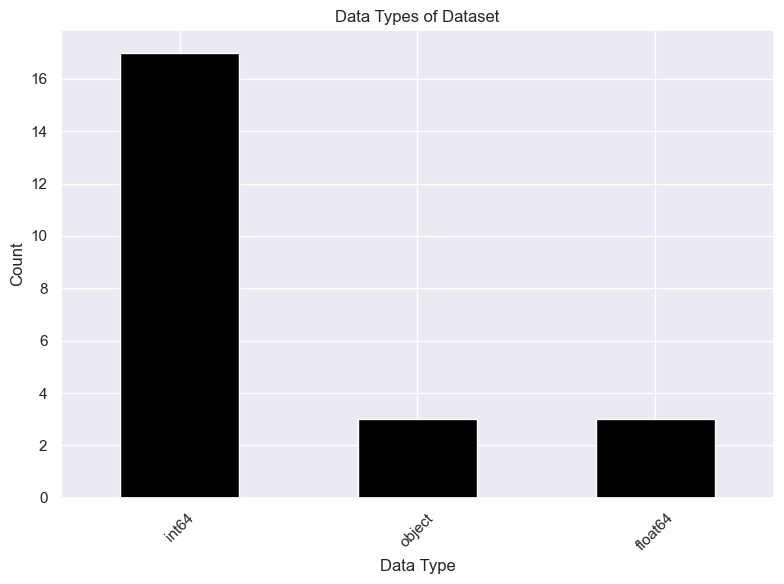

In [64]:
data = df
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8,6))
data_types.plot(kind='bar', color='black')
plt.title("Data Types of Dataset")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Count of null values in each feature 

In [65]:
df.isnull().sum()

dt                  0
switch              0
sourceIP            0
destinationIP       0
packetCount         0
byteCount           0
duration            0
duration_nsec       0
total_duration      0
flows               0
packetins           0
pktperflow          0
byteperflow         0
pktrate             0
Pairflow            0
Protocol            0
port_no             0
tx_bytes            0
rx_bytes            0
tx_kbps             0
rx_kbps           506
tot_kbps          506
label               0
dtype: int64

In [66]:
(df.isnull().sum()/df.isnull().count())*100

dt                0.00000
switch            0.00000
sourceIP          0.00000
destinationIP     0.00000
packetCount       0.00000
byteCount         0.00000
duration          0.00000
duration_nsec     0.00000
total_duration    0.00000
flows             0.00000
packetins         0.00000
pktperflow        0.00000
byteperflow       0.00000
pktrate           0.00000
Pairflow          0.00000
Protocol          0.00000
port_no           0.00000
tx_bytes          0.00000
rx_bytes          0.00000
tx_kbps           0.00000
rx_kbps           0.48493
tot_kbps          0.48493
label             0.00000
dtype: float64

#### Drop rows with null values

In [67]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [68]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt                0
switch            0
sourceIP          0
destinationIP     0
packetCount       0
byteCount         0
duration          0
duration_nsec     0
total_duration    0
flows             0
packetins         0
pktperflow        0
byteperflow       0
pktrate           0
Pairflow          0
Protocol          0
port_no           0
tx_bytes          0
rx_bytes          0
tx_kbps           0
rx_kbps           0
tot_kbps          0
label             0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [69]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

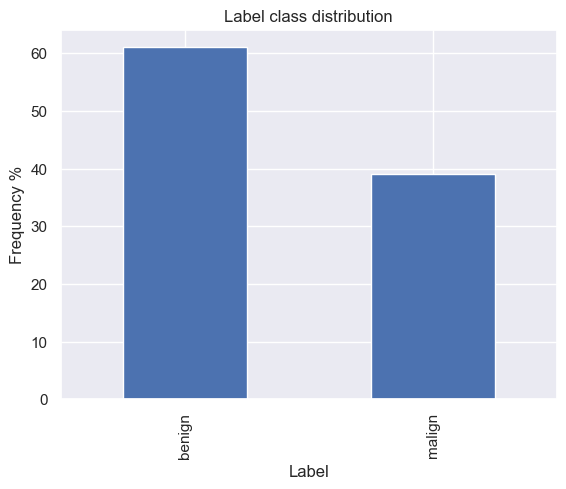

In [70]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


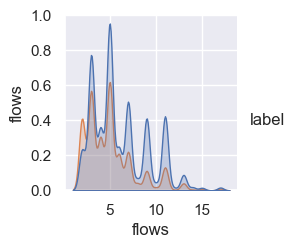

In [71]:
sns.pairplot(df,hue="label",vars=['flows'])

#### Columns in the dataset

In [19]:
df.columns

Index(['dt', 'switch', 'sourceIP', 'destinationIP', 'packetCount', 'byteCount',
       'duration', 'duration_nsec', 'total_duration', 'flows', 'packetins',
       'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol',
       'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
       'label'],
      dtype='object')

#### Unique values in each column

In [72]:
print(df.apply(lambda col: col.unique()))

dt                [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sourceIP          [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
destinationIP     [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
packetCount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
byteCount         [48294064, 134737070, 96294978, 110721156, 913...
duration          [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
duration_nsec     [716000000, 734000000, 744000000, 747000000, 7...
total_duration    [101000000000.0, 281000000000.0, 201000000000....
flows             [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins         [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow        [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow       [14428310, 14424046, 14427244, 14426178, 14184...
pktrate           [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                        

#### Numerical Features

In [73]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'packetCount', 'byteCount', 'duration', 'duration_nsec', 'total_duration', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [22]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['sourceIP', 'destinationIP', 'Protocol']


#### Number of Unique values in the numerical features 

In [74]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt                  858
switch               10
packetCount        9044
byteCount          9270
duration            840
duration_nsec      1000
total_duration     4183
flows                15
packetins           168
pktperflow         2092
byteperflow        2793
pktrate             446
Pairflow              2
port_no               5
tx_bytes          12257
rx_bytes          11623
tx_kbps            1800
rx_kbps            1730
tot_kbps           2259
label                 2
dtype: int64

#### Discrete numerical features

In [24]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [25]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'packetCount', 'byteCount', 'duration', 'duration_nsec', 'total_duration', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [27]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

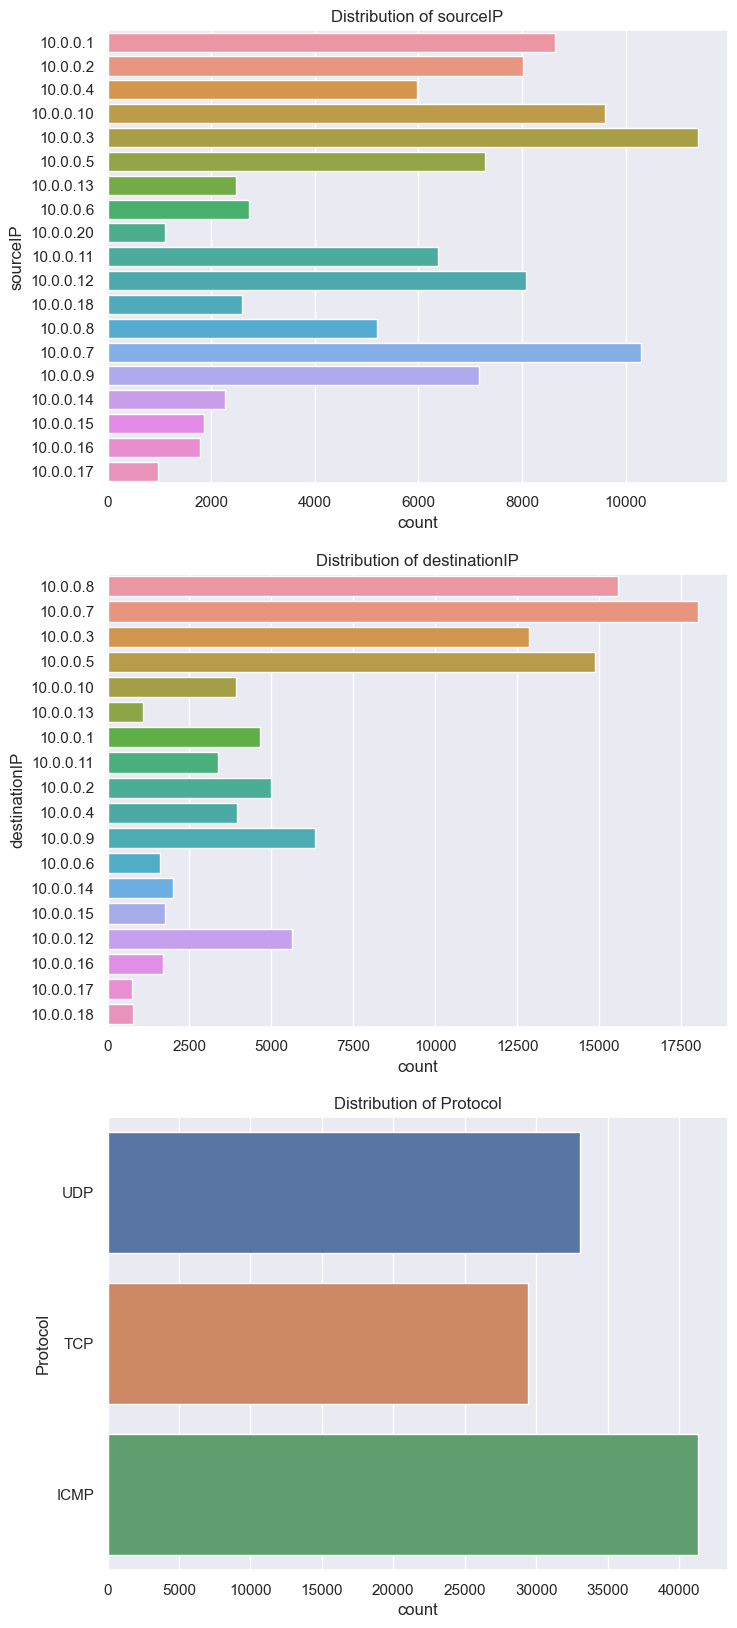

In [87]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the distribution of numerical discrete features

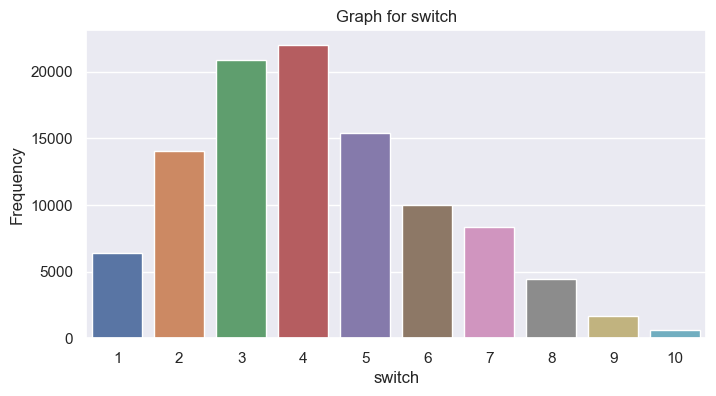

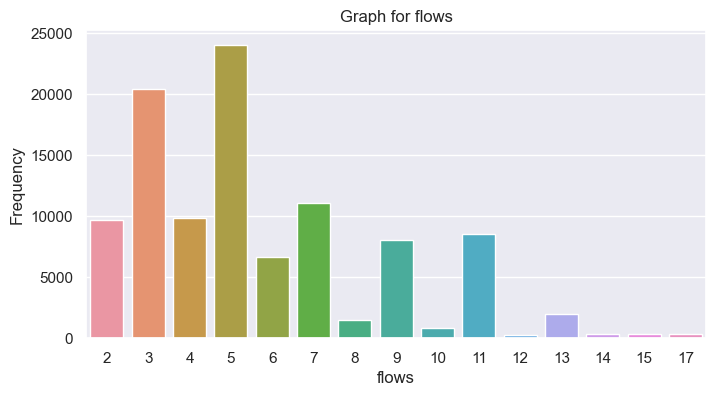

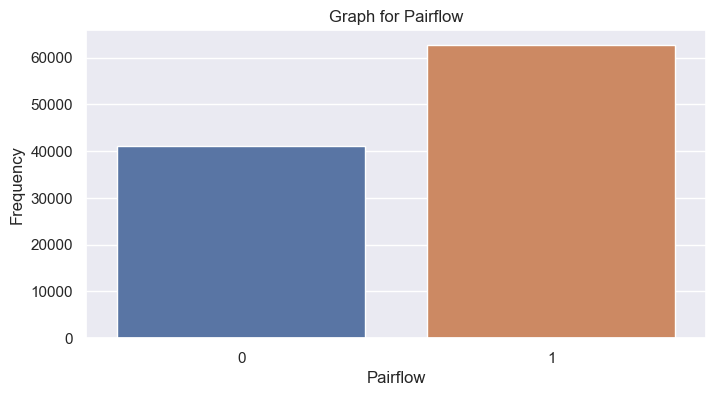

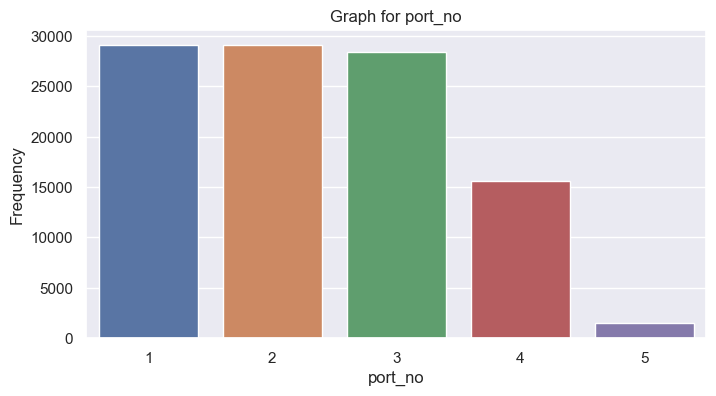

In [88]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [89]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

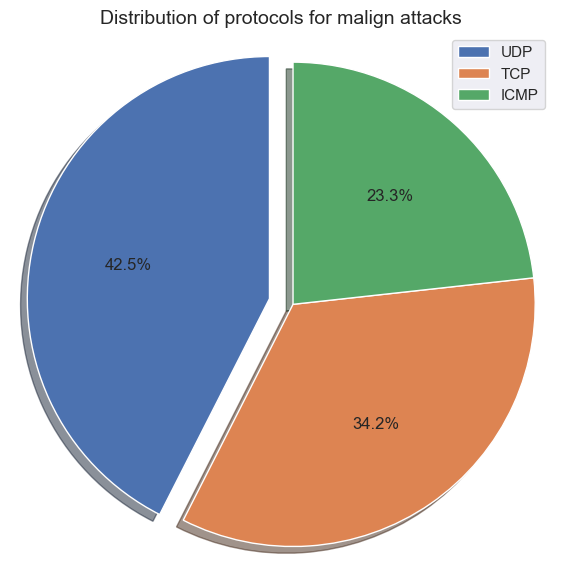

In [90]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

In [91]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['sourceIP', 'destinationIP', 'Protocol']


### Encoding categorical features

In [92]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [93]:
#dataframe after encoding
df.head(10)

,dt,switch,packetCount,byteCount,duration,duration_nsec,total_duration,flows,packetins,pktperflow,...,destinationIP_10.0.0.2,destinationIP_10.0.0.3,destinationIP_10.0.0.4,destinationIP_10.0.0.5,destinationIP_10.0.0.6,destinationIP_10.0.0.7,destinationIP_10.0.0.8,destinationIP_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


In [94]:
df.dtypes

dt                           int64
switch                       int64
packetCount                  int64
byteCount                    int64
duration                     int64
duration_nsec                int64
total_duration             float64
flows                        int64
packetins                    int64
pktperflow                   int64
byteperflow                  int64
pktrate                      int64
Pairflow                     int64
port_no                      int64
tx_bytes                     int64
rx_bytes                     int64
tx_kbps                      int64
rx_kbps                    float64
tot_kbps                   float64
label                        int64
sourceIP_10.0.0.10            bool
sourceIP_10.0.0.11            bool
sourceIP_10.0.0.12            bool
sourceIP_10.0.0.13            bool
sourceIP_10.0.0.14            bool
sourceIP_10.0.0.15            bool
sourceIP_10.0.0.16            bool
sourceIP_10.0.0.17            bool
sourceIP_10.0.0.18  

### Split into Independent and dependent variables

In [95]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [96]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 56) (31152, 56)


#### Deep Neural Network

In [98]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(56,), activation="relu", name="Hidden_Layer_1"))
model.add(Dense(8, activation="relu", name="Hidden_Layer_2"))
model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                912       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model fitting 

In [105]:
print(X_train.shape)
print(X_test.shape)

(72687, 56)
(31152, 56)


In [107]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=64, 
    epochs=30, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None)

Epoch 1/30
1136/1136 - 5s - loss: 0.4765 - accuracy: 0.7739 - val_loss: 0.4459 - val_accuracy: 0.7976 - 5s/epoch - 5ms/step
Epoch 2/30
1136/1136 - 5s - loss: 0.4166 - accuracy: 0.8208 - val_loss: 0.3869 - val_accuracy: 0.8385 - 5s/epoch - 5ms/step
Epoch 3/30
1136/1136 - 5s - loss: 0.3579 - accuracy: 0.8519 - val_loss: 0.3299 - val_accuracy: 0.8630 - 5s/epoch - 5ms/step
Epoch 4/30
1136/1136 - 5s - loss: 0.3054 - accuracy: 0.8730 - val_loss: 0.2851 - val_accuracy: 0.8813 - 5s/epoch - 5ms/step
Epoch 5/30
1136/1136 - 7s - loss: 0.2642 - accuracy: 0.8932 - val_loss: 0.2479 - val_accuracy: 0.9015 - 7s/epoch - 6ms/step
Epoch 6/30
1136/1136 - 6s - loss: 0.2317 - accuracy: 0.9103 - val_loss: 0.2180 - val_accuracy: 0.9184 - 6s/epoch - 5ms/step
Epoch 7/30
1136/1136 - 5s - loss: 0.2049 - accuracy: 0.9228 - val_loss: 0.1954 - val_accuracy: 0.9270 - 5s/epoch - 5ms/step
Epoch 8/30
1136/1136 - 6s - loss: 0.1837 - accuracy: 0.9311 - val_loss: 0.1759 - val_accuracy: 0.9302 - 6s/epoch - 5ms/step
Epoch 9/

## Plotting Loss v/s Epochs 

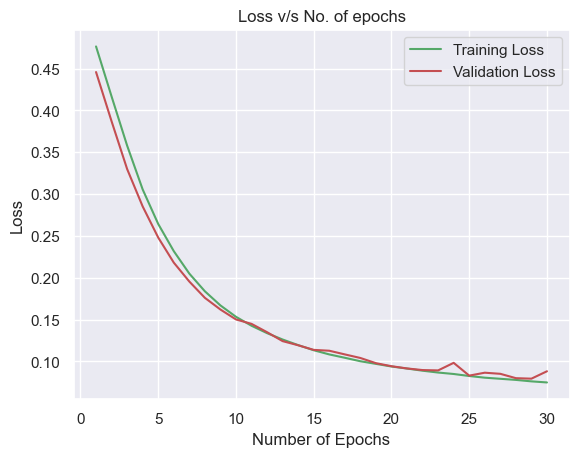

In [108]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

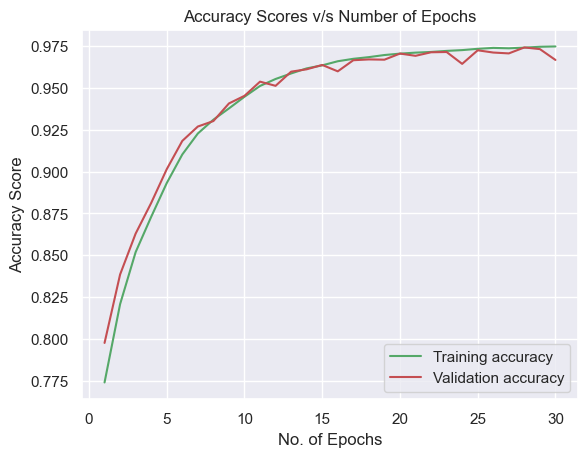

In [109]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [110]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 [==============================] - 4s 4ms/step - loss: 0.0881 - accuracy: 0.9668
Accuracy of Deep neural Network : 96.68


In [111]:
classes = model.predict(X_test)
print(classes)

974/974 [==============================] - 5s 4ms/step
[[2.5236359e-02]
 [9.2522707e-04]
 [6.4998478e-01]
 ...
 [1.0574805e-04]
 [9.5149153e-01]
 [4.0437951e-04]]


In [112]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

## Classification Report 

In [113]:
print(classification_report( y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       0.96      0.99      0.97     19014
      malign       0.98      0.94      0.96     12138

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.96     31152
weighted avg       0.97      0.97      0.97     31152



## Plotting Confusion Matrix

In [114]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

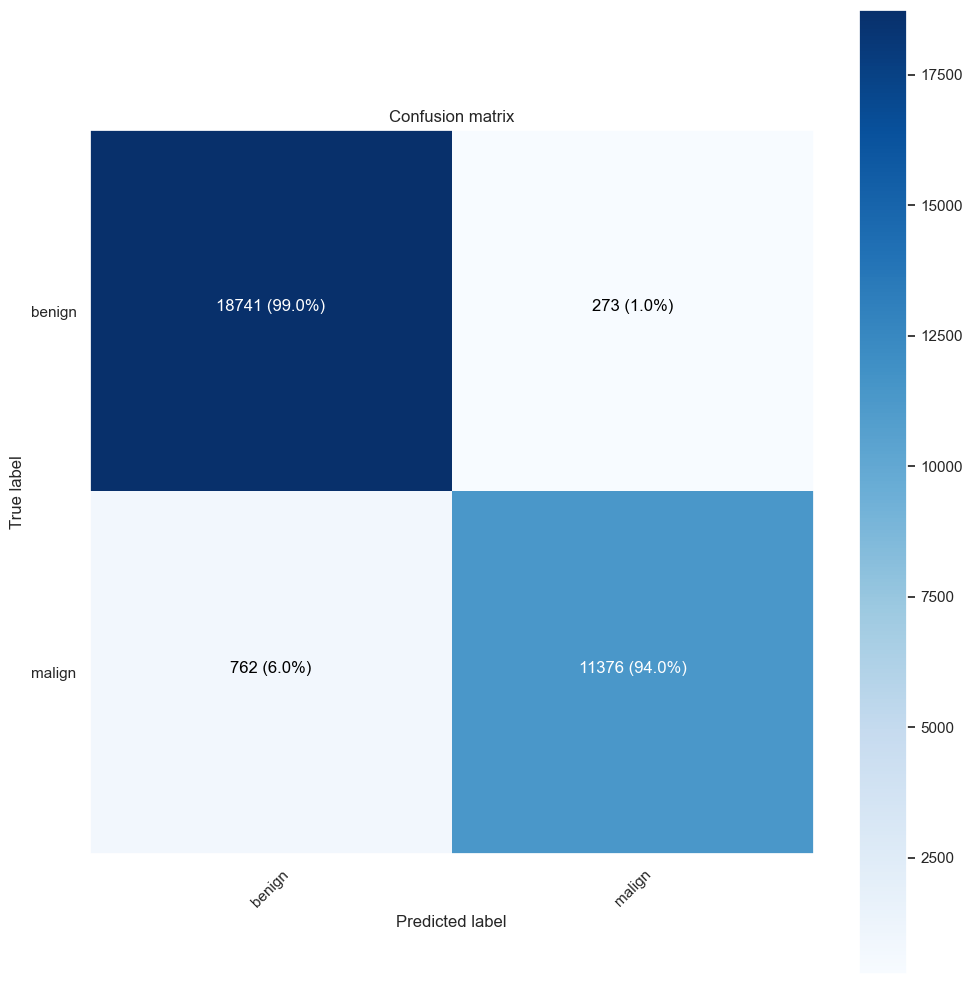

In [115]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

The ROC_AUC for the model is 0.96


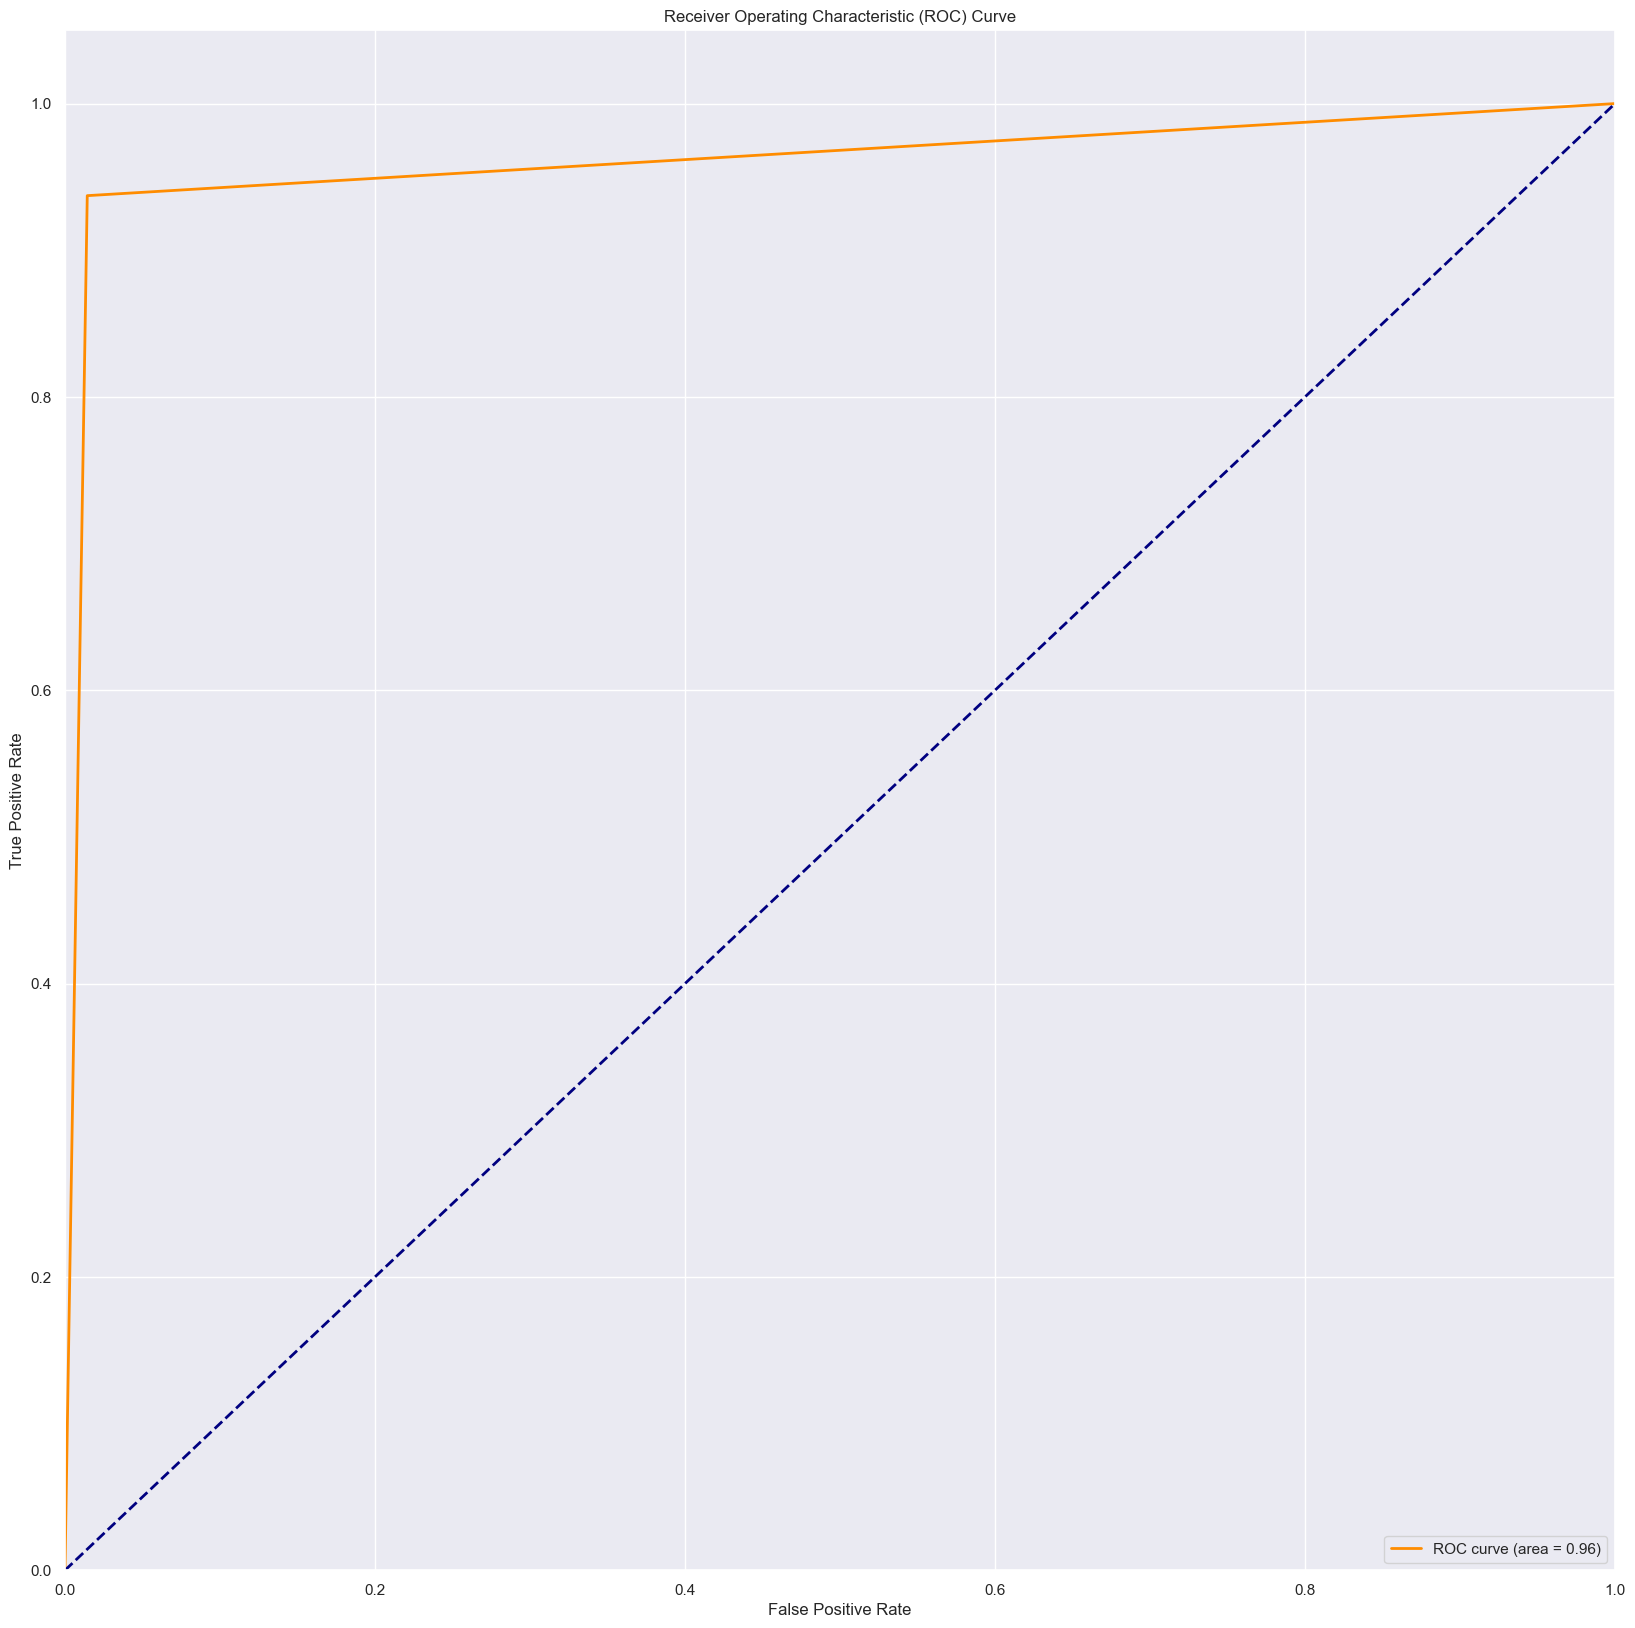

In [133]:
from sklearn.metrics import roc_curve, auc, roc_curve, roc_auc_score
# Computing ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'The ROC_AUC for the model is {roc_auc:.2f}')
# Plotting ROC curve
plt.figure(figsize=(20,20))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
